In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train.isnull().sum())
print('-'*40)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


So we have 177 missing values in Age, 687 in Cabin and 2 in Embarked columns in Training Set.

We have 86 missing values in Age, 1 in Fare and 327 in Cabin columns in Test Set.

In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Data Visualization

Bar Graph for Categorical Features

In [9]:
def bar_graph(feature):
    survived = train[feature][train['Survived']==1].value_counts()
    dead = train[feature][train['Survived']==0].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked=True, figsize=(10, 5))

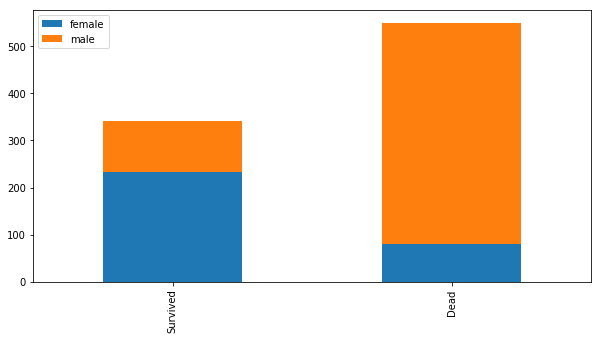

In [10]:
bar_graph('Sex')

This shows majority of the survivors were women.

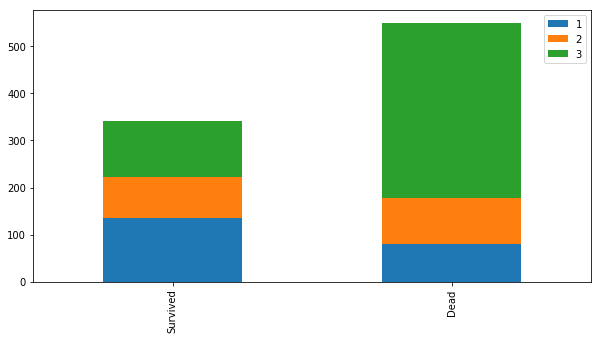

In [11]:
bar_graph('Pclass')

3rd class are more likely to die as compared to other classes.

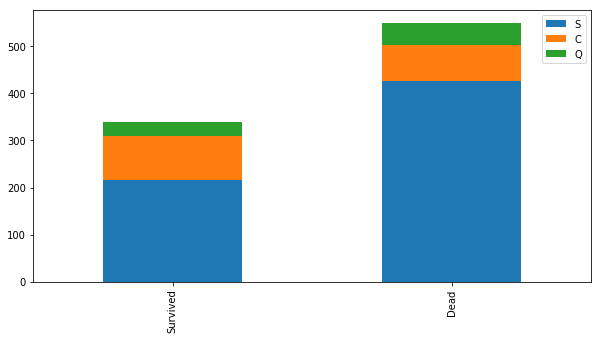

In [12]:
bar_graph('Embarked')

Person boarded from *S* is more likely Dead.

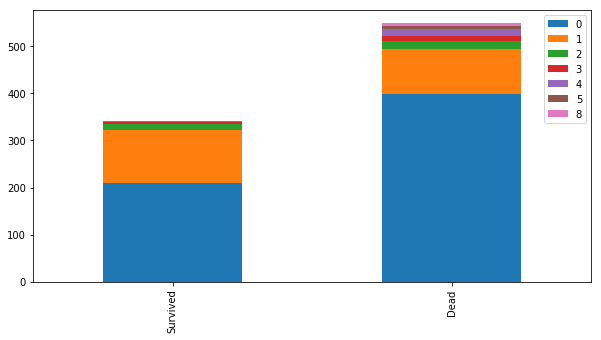

In [13]:
bar_graph('SibSp')

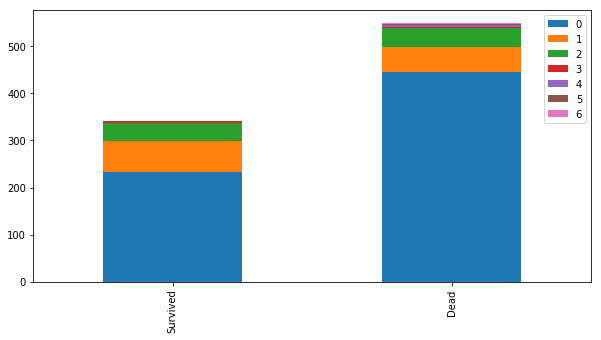

In [14]:
bar_graph('Parch')

Person boarded without siblings or spouse more likely dead.

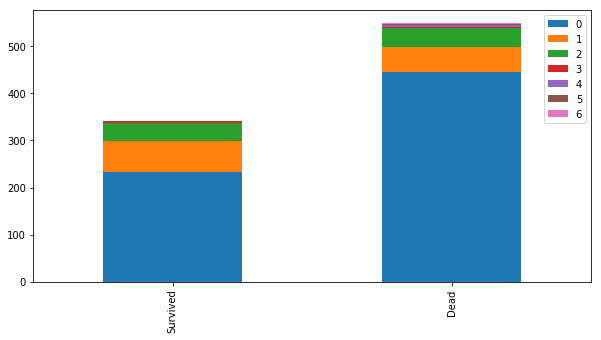

In [15]:
bar_graph('Parch')

This shows person who boarded alone is more likely dead.

# Feature Engineering

### Name

In [16]:
#Combining the train and test set
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [17]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Capt          1
Ms            1
Sir           1
Jonkheer      1
Don           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [18]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


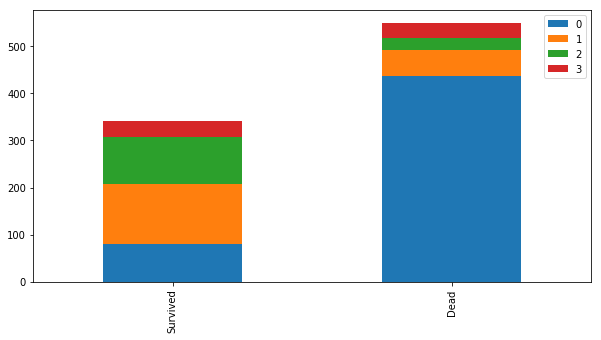

In [21]:
bar_graph('Title')

majority of people of Title 0 i.e. *Mr* are more likely dead.

In [22]:
for dataset in train_test_data:
    dataset.drop('Name', axis=1, inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### Sex

In [25]:
sex_mapping = {'female':0, 'male':1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

### Age

In [26]:
train.Age.isnull().sum()

177

In [27]:
test.Age.isnull().sum()

86

We have missing values in Age in both train and test set

In [28]:
# Filling missing age with median age for each title

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [29]:
print("Null values in train(Age):", train.Age.isnull().sum())
print("Null values in test(Age):", test.Age.isnull().sum())

Null values in train(Age): 0
Null values in test(Age): 0


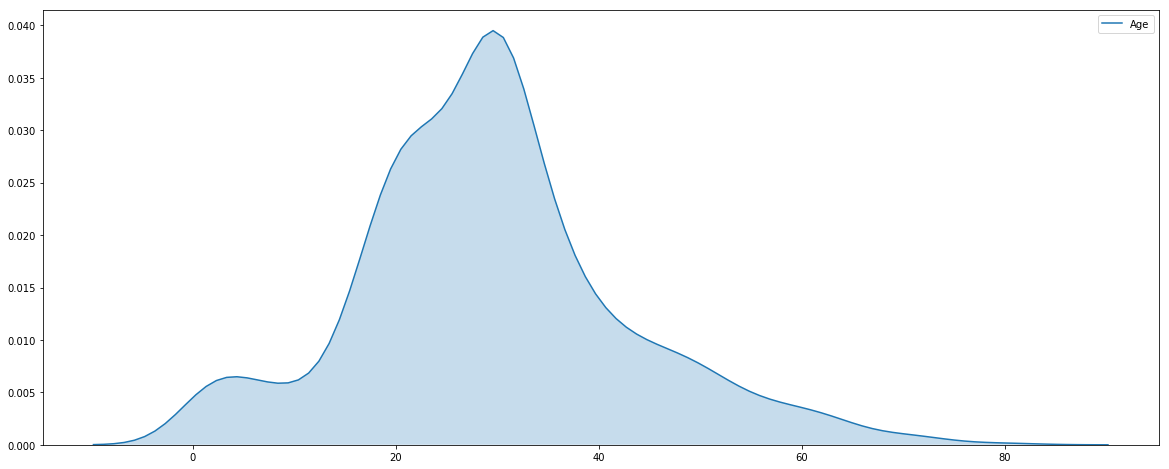

In [30]:
plt.figure(figsize=(20,8))
sns.kdeplot(train['Age'], shade=True)
plt.show()

In [31]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 25), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 60), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4

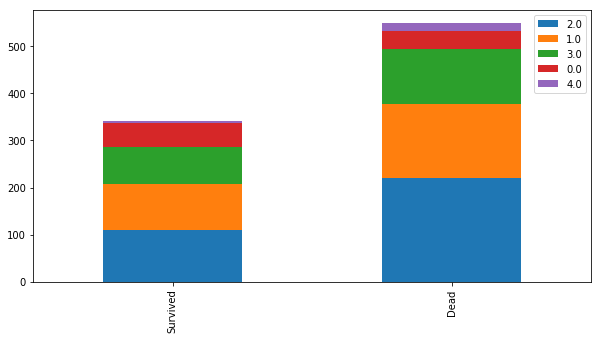

In [32]:
bar_graph('Age')

### Embarked

In [33]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As *'S'* is most occuring, we will fill the missing values with it

In [34]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,0,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,0,0


### Fare

In [37]:
# fill missing Fare with median fare for each Pclass

test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

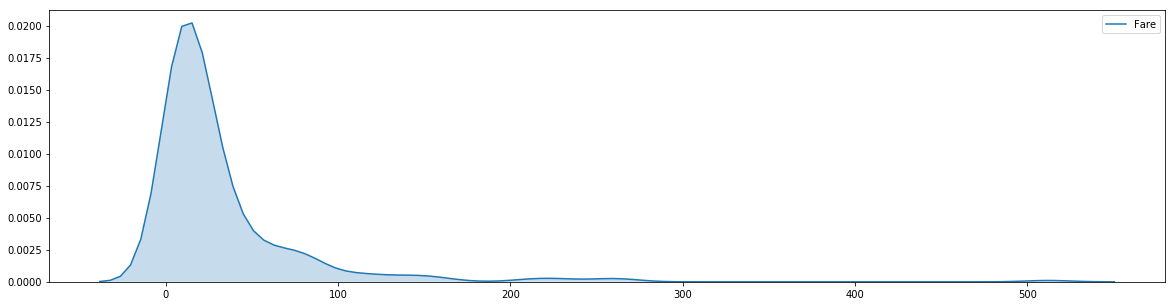

In [38]:
plt.figure(figsize=(20,5))
sns.kdeplot(train['Fare'], shade=True)
plt.show()

(0, 50)

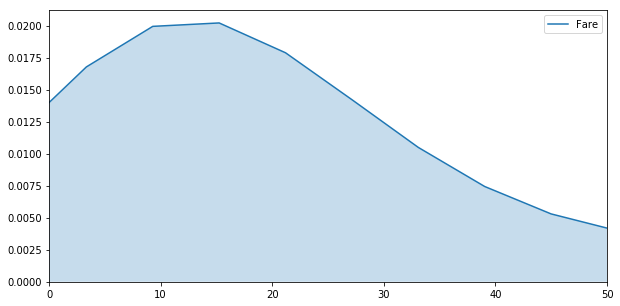

In [39]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['Fare'], shade=True)
plt.xlim(0, 50)

(50, 580.0758591738759)

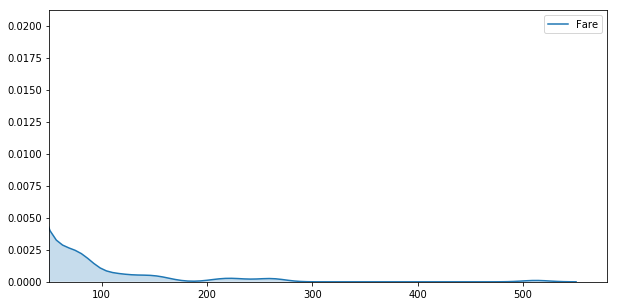

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['Fare'], shade=True)
plt.xlim(50)

In [41]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 15, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,0,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,0,0


### SibSp and Parch

In [43]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

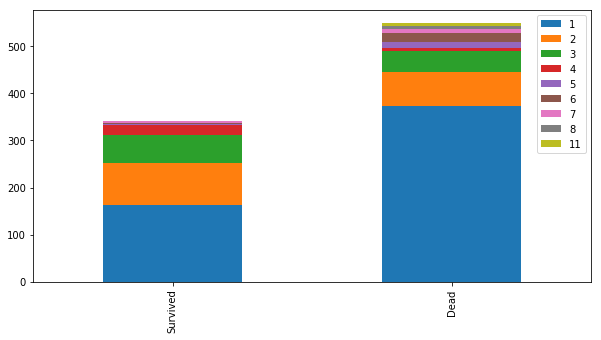

In [44]:
bar_graph('FamilySize')

In [45]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

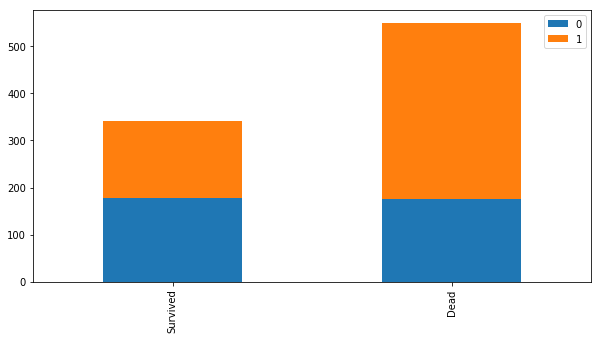

In [46]:
bar_graph('IsAlone')

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,0,2,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,C85,1,2,2,0
2,3,1,3,0,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,1,1
3,4,1,1,0,2.0,1,0,113803,2.0,C123,0,2,2,0
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,0,0,1,1


In [48]:
drop_features = ['PassengerId', 'SibSp', 'Parch', 'Ticket', 'FamilySize', 'Cabin']

for dataset in train_test_data:
    dataset.drop(drop_features, axis=1, inplace=True)

train.head()

In [49]:
target = train['Survived']
train.drop('Survived', axis=1, inplace=True)

In [50]:
train.shape, target.shape, test.shape

((891, 7), (891,), (418, 7))

# Modelling

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression

In [52]:
log_reg = LogisticRegression()
log_reg.fit(train, target)
predictions = log_reg.predict(test)
acc_log = round(log_reg.score(train, target) * 100, 2)
acc_log

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.47

#### SGD Classifier

In [53]:
sgd_clf = SGDClassifier()
sgd_clf.fit(train, target)
predictions = sgd_clf.predict(test)
acc_sgd = round(sgd_clf.score(train, target) * 100, 2)
acc_sgd

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


79.12

#### KNN

In [54]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(train, target)
predictions = knn_clf.predict(test)
acc_knn = round(knn_clf.score(train, target) * 100, 2)
acc_knn

85.52

#### SVC

In [55]:
svc = SVC()
svc.fit(train, target)
predictions = svc.predict(test)
acc_svc = round(svc.score(train, target) * 100, 2)
acc_svc

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.95

#### GaussianNB

In [56]:
gaussian = GaussianNB()
gaussian.fit(train, target)
predictions = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

77.67

#### Decision Tree

In [57]:
tree = DecisionTreeClassifier()
tree.fit(train, target)
predictions = tree.predict(test)
acc_tree = round(tree.score(train, target) * 100, 2)
acc_tree

87.21

#### Random Forest

In [58]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(train, target)
predictions = forest.predict(test)
forest.score(train, target)
acc_forest = round(forest.score(train, target) * 100, 2)
acc_forest

87.21

In [59]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_forest, acc_gaussian, 
              acc_sgd, acc_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.21
6,Decision Tree,87.21
1,KNN,85.52
0,Support Vector Machines,83.95
2,Logistic Regression,80.47
5,Stochastic Gradient Decent,79.12
4,Naive Bayes,77.67
